# Paramétrage

Pour une particule évaluant sur une courbe d'équation $y=f(x)$ on sait grâce à la conservation de l'énergie que la vitesse est donnée par
$$v=\sqrt{-2gf(x)}.$$
(Et ce indépendamment de la masse de la particule!!)

Mais cette même vitesse vaut également
$$\sqrt{\dot{x}^2+\dot{y}^2}=\dot{x}\sqrt{1+f^{'2}(x)}.$$
On discrétise alors la courbe en 
$$x_{n+1}=x_n+\Delta t \sqrt{\frac{-2gf(x_n)}{1+f^{'2}(x_n)}}.$$

# Calculs

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
plt.rc('figure', figsize=(12, 9))

In [3]:
from IPython.display import HTML

## Positions pour temps donnés

In [4]:
def position(f, df, temps, xmax):
    X = np.zeros_like(temps)
    for n in range(len(temps)-1):
        if X[n] < xmax:
            X[n+1] = X[n]+(temps[n+1]-temps[n])*np.sqrt(0.01+(-2*9.8*f(X[n]))/(1+df(X[n])**2))
        else:
            X[n+1] = X[n]
    return X, f(X)
        

In [14]:
t = np.arange(0, 3, 0.01)

def f(x) : return x**2-5*x
def df(x) : return 2*x-5
X, Y = position(f, df, t, 4)

def g(x) : return -x
def dg(x) : return -1
U, V = position(g, dg, t, 4)

def h(x) : return (f(x)+g(x))/2
def dh(x) : return (df(x)+dg(x))/2
R, S = position(h, dh, t, 4)

def j(x) : return h(x)-np.sin(np.pi*x) 
def dj(x) : return dh(x)-np.pi*np.cos(np.pi*x)
I, J = position(j, dj, t, 4)

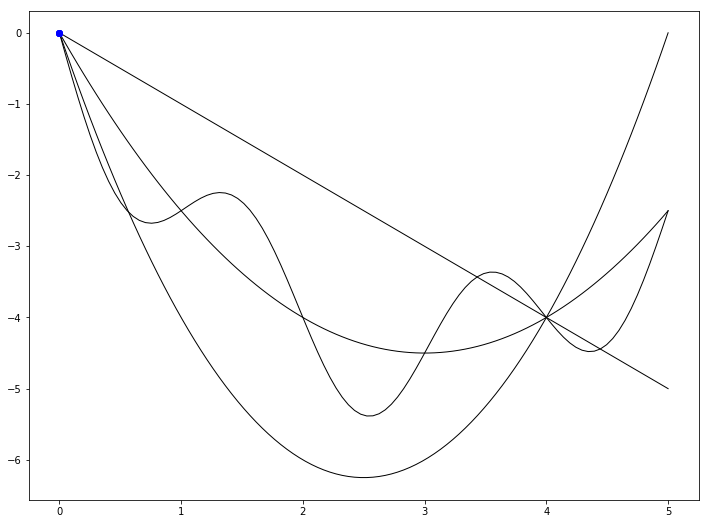

In [15]:
fig, ax = plt.subplots()

points = np.linspace(0, 5, 100)
ax.plot(points, f(points), lw=1, color="black")
ax.plot(points, g(points), lw=1, color="black")
ax.plot(points, h(points), lw=1, color="black")
ax.plot(points, j(points), lw=1, color="black")


P, = ax.plot([0], [0], marker="o", color="blue")
Q, = ax.plot([0], [0], marker="o", color="blue")
M, = ax.plot([0], [0], marker="o", color="blue")
N, = ax.plot([0], [0], marker="o", color="blue")


def maj(i):
    P.set_xdata([X[i]])
    P.set_ydata([Y[i]])
    Q.set_xdata([U[i]])
    Q.set_ydata([V[i]])
    M.set_xdata([R[i]])
    M.set_ydata([S[i]])
    N.set_xdata([I[i]])
    N.set_ydata([J[i]])
    return P,
    
ani = FuncAnimation(fig, maj, frames=range(len(X)), interval=50, blit=True)

In [16]:
HTML(ani.to_html5_video())

# Calcul du temps